In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score





# gestion des dataset

## NSL-KDD

In [3]:
directory = "NSL-KDD/"
train_file = "KDDTrain+.txt"
test_file = "KDDTest+.txt"
train_path = os.path.join(directory, train_file)


In [4]:

# Load the dataset
df = pd.read_csv(train_path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## NF-UQ-NIDS

### Load an visualize data

In [23]:
directory = "datasets/"
dataset_file = "NF-UQ-NIDS.csv"
dataset_path = os.path.join(directory, dataset_file)

In [24]:
# load the dataset
df = pd.read_csv(dataset_path)

In [25]:
# df unique values Attack Type
df['Attack'].unique()

array(['Benign', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Backdoor', 'Fuzzers', 'Worms', 'Analysis',
       'injection', 'DDoS', 'scanning', 'password', 'mitm', 'xss',
       'ransomware', 'Infilteration', 'Bot', 'Brute Force', 'Theft'],
      dtype=object)

In [26]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign,NF-UNSW-NB15
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign,NF-UNSW-NB15
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign,NF-UNSW-NB15
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign,NF-UNSW-NB15
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign,NF-UNSW-NB15


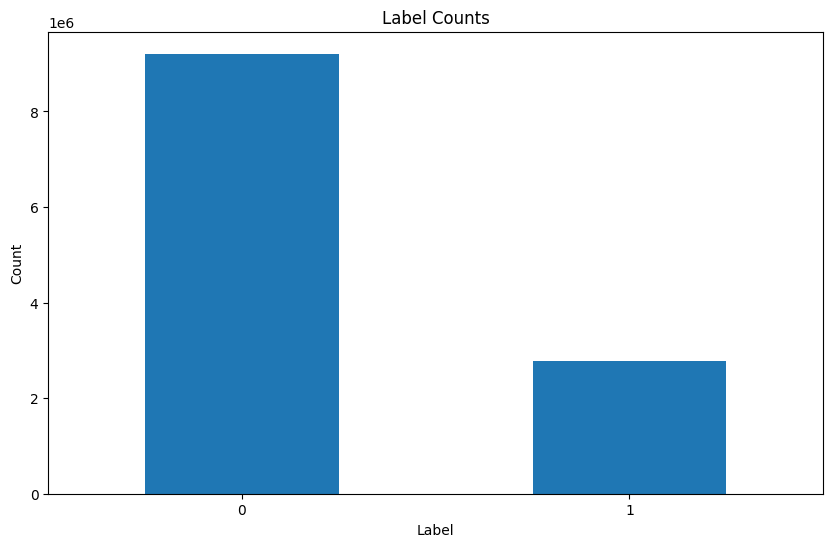

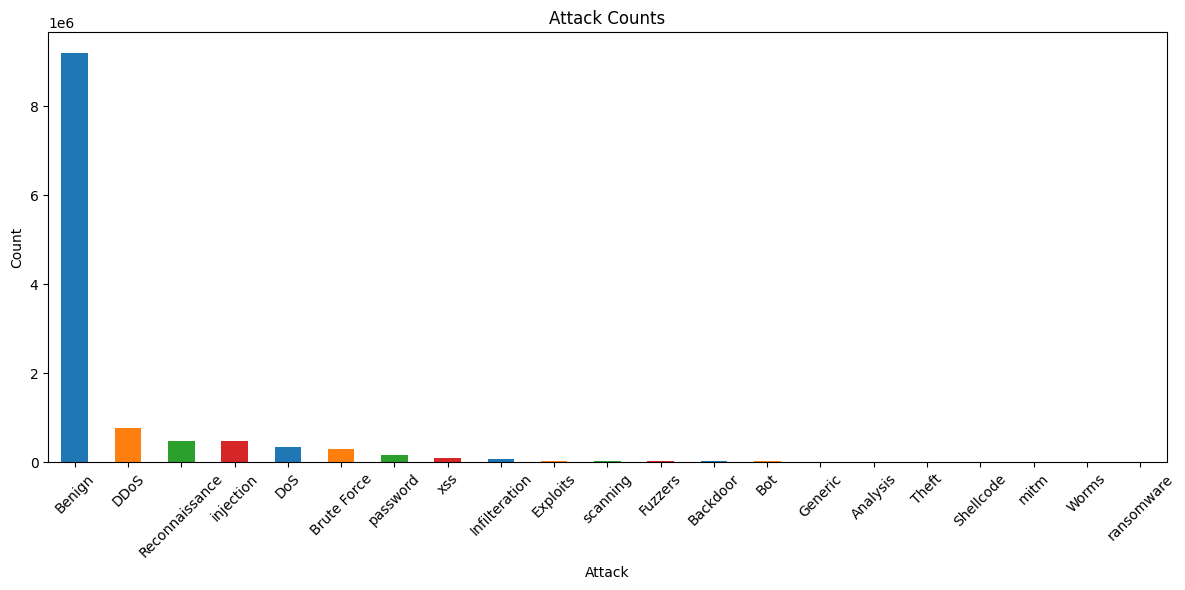

In [27]:
# visualize the dataset columns Label and attack
df['Label'].value_counts().plot(kind='bar', figsize=(10, 6), rot=0)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Counts")
plt.show()

# Count the occurrences of each attack
attack_counts = df['Attack'].value_counts()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart with custom colors
attack_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], rot=45)

# Add labels and title
plt.xlabel("Attack")
plt.ylabel("Count")
plt.title("Attack Counts")

# Adjust spacing between bars and labels
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
# train test split and keep ratio of each Attack class


train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Attack'])

### preprocessing data

In [28]:
# preprocess the data

# encore the categorical features


# create a copy of the train and test data
df_enc = df.copy()
features_names = "IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset"
# create an object of the LabelEncoder
list_of_le = {}
# apply the LabelEncoder on the categorical features
for feature in features_names.split(","):
    le = LabelEncoder()
    df_enc[feature] = le.fit_transform(df_enc[feature])
    list_of_le[feature] = le



    
    


In [8]:
train_enc, test_enc = train_test_split(df_enc, test_size=0.2, random_state=42, stratify=df_enc['Attack'])

In [8]:
#unique df_enc['Attack'] values
df_enc['Attack'].unique()

array([ 2,  7, 11,  6,  9, 12,  1,  8, 14,  0, 15,  5, 19, 17, 16, 20, 18,
       10,  3,  4, 13])

In [9]:
# drop  column dataset
train_enc = train_enc.drop(['Dataset'], axis=1)
test_enc = test_enc.drop(['Dataset'], axis=1)

NameError: name 'train_enc' is not defined

In [12]:
train_enc.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
864452,64615,61222,5260,59037,6,147,4521,45661,78,80,16,45,0,2
8655545,21040,49536,6626,40,17,0,30,97,1,1,0,118551,0,2
8406457,31277,55022,6704,320,6,0,469,338,5,5,19,117707,0,2
9726205,21278,17,1345,56612,6,0,12,0,1,0,9,0,0,2
9485701,27624,44507,6902,58,6,0,4668,0,37,0,16,0,1,6


In [29]:
# only keep 10% of each class in a df copy 
df_10 = df.copy()
df_10 = df_10.groupby('Attack').apply(lambda x: x.sample(frac=0.1))
df_10 = df_10.reset_index(drop=True)

# encode the categorical features
df_10_enc = df_10.copy()



features_names = "IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset"
# create an object of the LabelEncoder
list_of_le_10 = {}
# apply the LabelEncoder on the categorical features
for feature in features_names.split(","):
    le = LabelEncoder()
    df_10_enc[feature] = le.fit_transform(df_10_enc[feature])
    list_of_le_10[feature] = le




In [30]:
#drop column dataset
df_10_enc = df_10_enc.drop(['Dataset'], axis=1)

In [32]:
df_10_enc_data_aug = df_10_enc.copy()
# duplicate 3 time data with label 1
df_10_enc_data_aug = df_10_enc_data_aug.append([df_10_enc_data_aug[df_10_enc_data_aug['Label'] == 1]]*2,ignore_index=True)

C:\Users\enzoh\AppData\Local\Temp\ipykernel_37992\4036499671.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_10_enc_data_aug = df_10_enc_data_aug.append([df_10_enc_data_aug[df_10_enc_data_aug['Label'] == 1]]*2,ignore_index=True)


<AxesSubplot: xlabel='Label', ylabel='count'>

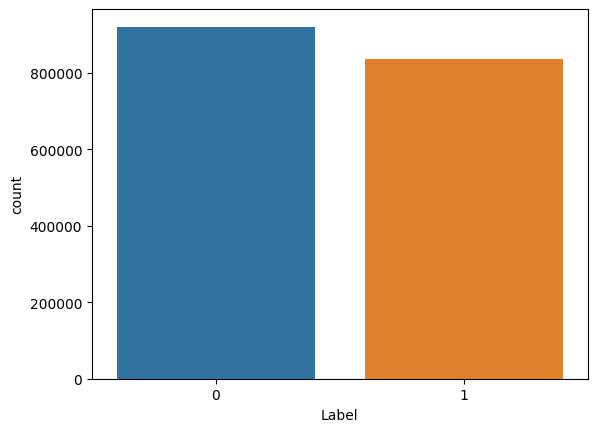

In [22]:

sns.countplot(x='Label', data=df_10_enc_data_aug)



In [31]:
# train test split and keep ratio of each Attack class
train_10_enc, test_10_enc = train_test_split(df_10_enc, test_size=0.30, random_state=42, stratify=df_10_enc['Attack'])

In [9]:
train_10_enc_lab,test_10_enc_lab = train_test_split(df_10_enc, test_size=0.30, random_state=42, stratify=df_10_enc['Label'])

In [32]:
# XGBoost

xgb_clf_10 = xgb.XGBClassifier(objective='binary:logistic', n_jobs=-1, random_state=42)

xgb_clf_10.fit(train_10_enc.drop(['Attack','Label'], axis=1), train_10_enc['Attack'])






XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [34]:
xgb_clf_10.score(test_10_enc.drop(['Attack','Label'], axis=1), test_10_enc['Attack'])

0.9532440175963673

In [42]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix

# Assuming you have your encoded training data without labels (train_10_enc) and XGBoost classifier (xgb_clf_10)
X_test = test_10_enc.drop(['Attack', 'Label'], axis=1)  # Features of the test data

# Make predictions on the test data
y_pred = xgb_clf_10.predict(X_test)

# Get the unique predicted classes
predicted_classes = np.unique(y_pred)

# Get the index of the benign class
benign_index = list(xgb_clf_10.classes_).index(2)

# Create a confusion matrix
confusion_mat = confusion_matrix(test_10_enc['Attack'], y_pred, labels=predicted_classes)

# False negatives for benign traffic (benign class misclassified as something else)
false_negatives = confusion_mat[benign_index, :].sum() - confusion_mat[benign_index, benign_index]

# False positives for other classes (misclassification of other classes as benign traffic)
false_positives = sum(confusion_mat[i, benign_index] for i in range(len(confusion_mat)) if i != benign_index)

print("False negatives (benign traffic):", false_negatives)
print("False positives:", false_positives)



False negatives (benign traffic): 648
False positives: 1316


In [11]:
xgb_clf_10_lab = xgb.XGBClassifier(objective='binary:logistic', n_jobs=-1, random_state=42)

xgb_clf_10_lab.fit(train_10_enc_lab.drop(['Attack','Label'], axis=1), train_10_enc_lab['Label'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [33]:
xgb_clf_10_lab.score(test_10_enc_lab.drop(['Attack','Label'], axis=1), test_10_enc_lab['Label'])

0.9946088198595514

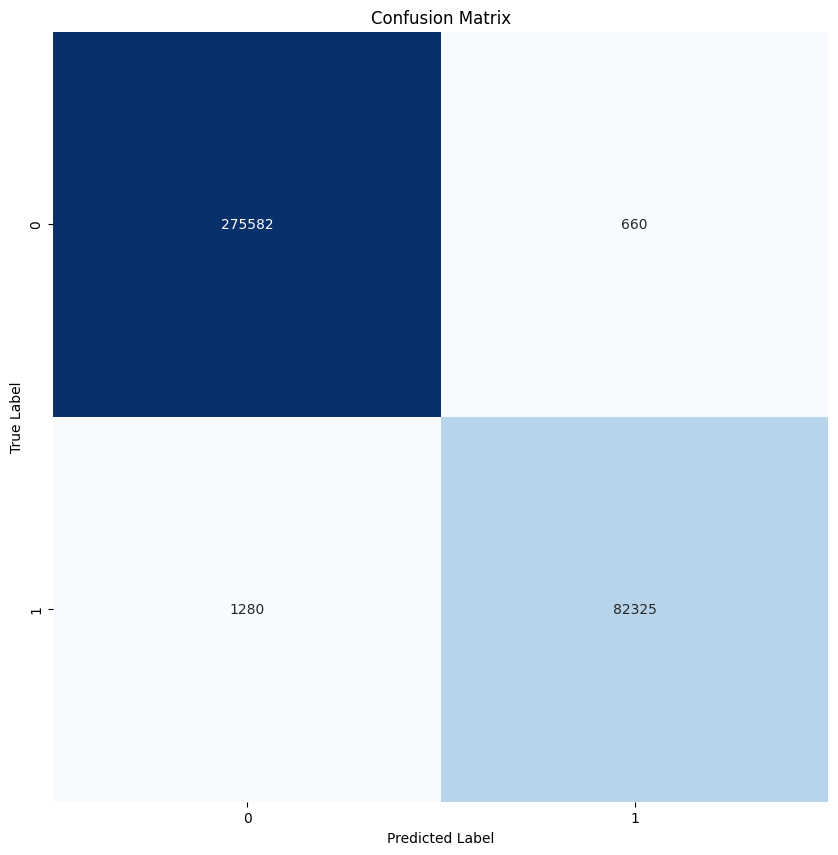

In [18]:
xgb_clf_10_lab.score(test_10_enc_lab.drop(['Attack','Label'], axis=1), test_10_enc_lab['Label'])

# plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_10_enc_lab['Label'], xgb_clf_10_lab.predict(test_10_enc_lab.drop(['Attack','Label'], axis=1)))
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [46]:
xgb_clf_10.score(test_10_enc.drop(['Attack','Label'], axis=1), test_10_enc['Attack'])

0.8059730941205568

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'Analysis'),
  Text(0, 1.5, 'Backdoor'),
  Text(0, 2.5, 'Benign'),
  Text(0, 3.5, 'Bot'),
  Text(0, 4.5, 'Brute Force'),
  Text(0, 5.5, 'DDoS'),
  Text(0, 6.5, 'DoS'),
  Text(0, 7.5, 'Exploits'),
  Text(0, 8.5, 'Fuzzers'),
  Text(0, 9.5, 'Generic'),
  Text(0, 10.5, 'Infilteration'),
  Text(0, 11.5, 'Reconnaissance'),
  Text(0, 12.5, 'Shellcode'),
  Text(0, 13.5, 'Theft'),
  Text(0, 14.5, 'Worms'),
  Text(0, 15.5, 'injection'),
  Text(0, 16.5, 'mitm'),
  Text(0, 17.5, 'password'),
  Text(0, 18.5, 'ransomware'),
  Text(0, 19.5, 'scanning'),
  Text(0, 20.5, 'xss')])

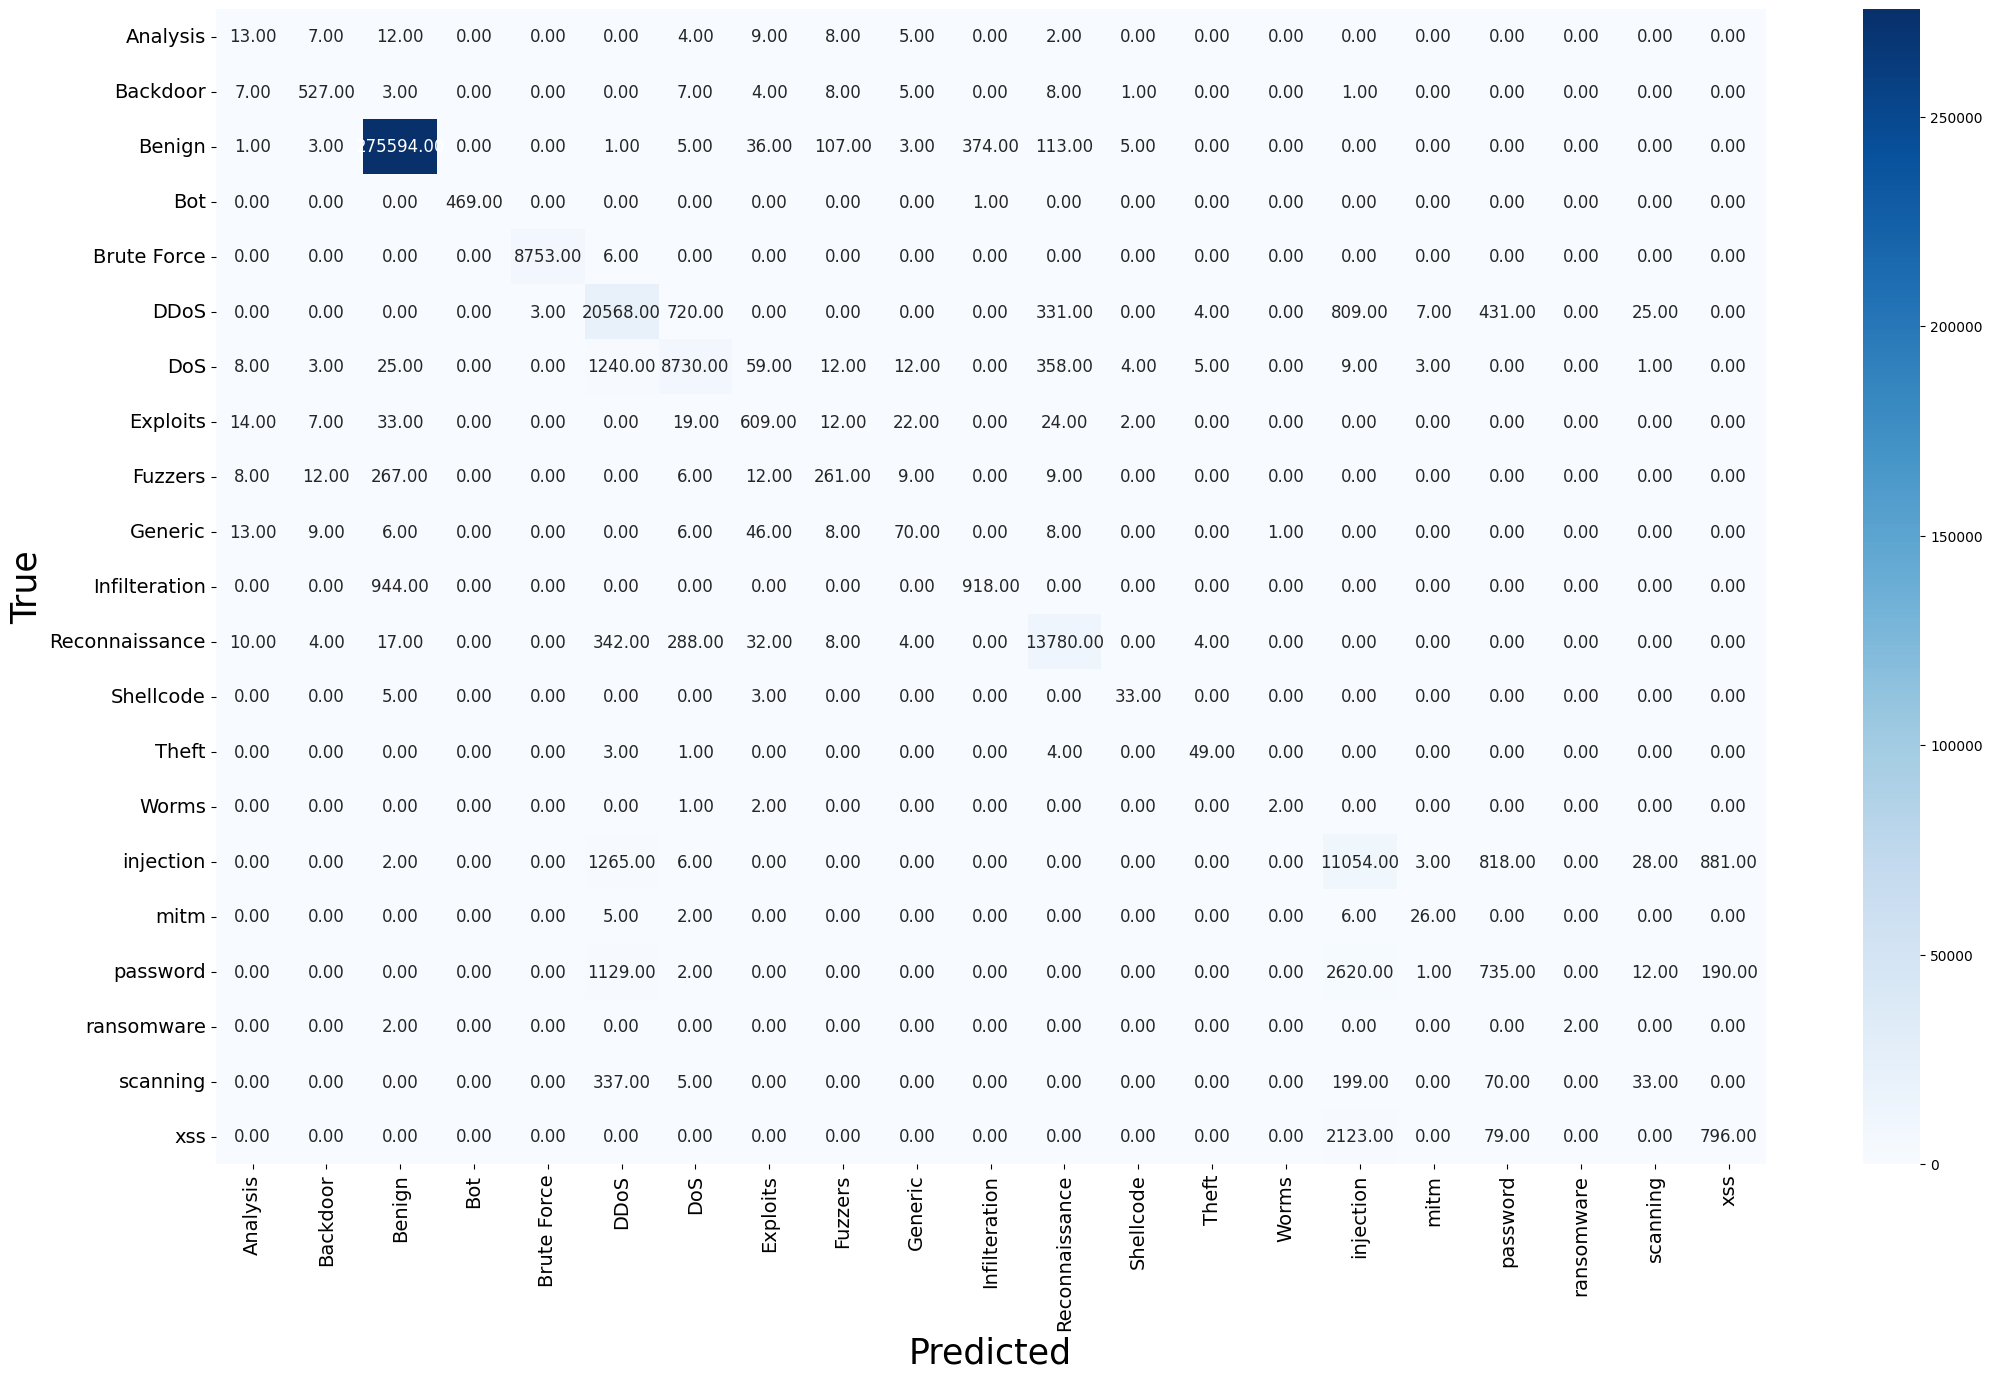

In [35]:
# plot confusion matrix with original labels
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_10_enc['Attack'], xgb_clf_10.predict(test_10_enc.drop(['Attack','Label'], axis=1)))
plt.figure(figsize=(25, 15))
# plot seaboern with original labels
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=list_of_le_10['Attack'].classes_, yticklabels=list_of_le_10['Attack'].classes_, annot_kws={"size": 12}, cmap='Blues')

plt.xlabel('Predicted',fontsize=25)
# increase size of x label

plt.ylabel('True',fontsize=25)

#increase font size of labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [21]:
# import classification report
from sklearn.metrics import classification_report


def plot_classification_report(model, X_test, y_test, target_names,name,deep_learning=False):
    """
    Plots the classification report heatmap for a given model's predictions on test data.
    
    Args:
    model : A trained TensorFlow model
    X_test : Test data
    y_test : Ground truth labels for test data
    target_names : Names of the classes
    
    Returns:
    A heatmap plot of the classification report.
    """
    
    # Get the model's predictions on the test data
    y_pred = model.predict(X_test)

    if deep_learning:
        # If the model is a deep learning model, round the predictions to 0 or 1
        y_pred_classes = np.argmax(y_pred, axis=1)
        # Calculate the classification report
        report = classification_report(y_test, y_pred_classes, target_names=target_names, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        report_df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0, inplace=True)
    else:
        # Calculate the classification report
        report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        report_df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0, inplace=True)


    #title
    plt.title(f'Classification Report for {name}')

    
    # Plot the heatmap
    sns.heatmap(report_df.drop(['support'], axis=1).astype(float), annot=True, cmap='coolwarm')
    plt.show()

c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

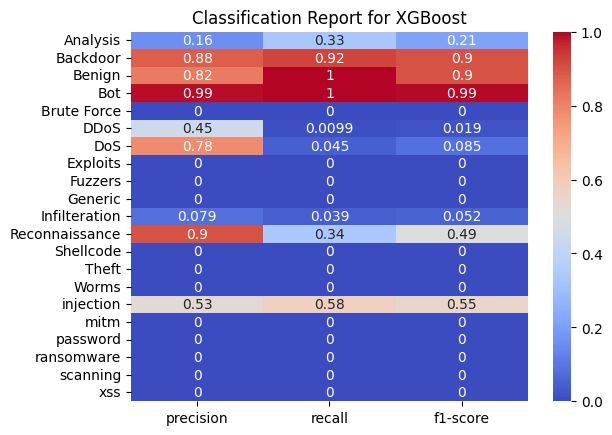

In [49]:
plot_classification_report(xgb_clf_10, test_10_enc.drop(['Attack','Label'], axis=1), test_10_enc['Attack'], list_of_le_10['Attack'].classes_, 'XGBoost')

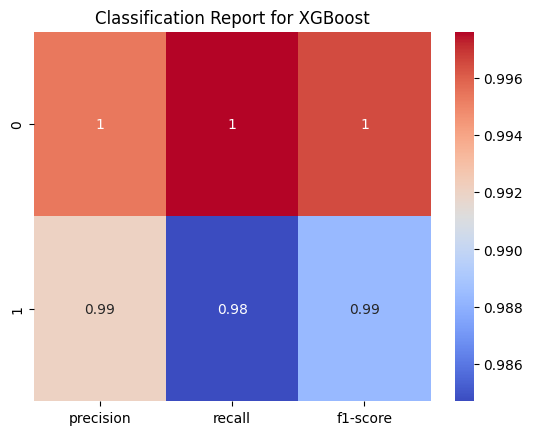

In [22]:
plot_classification_report(xgb_clf_10_lab, test_10_enc_lab.drop(['Attack','Label'], axis=1), test_10_enc_lab['Label'], list_of_le_10['Label'].classes_, 'XGBoost')

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

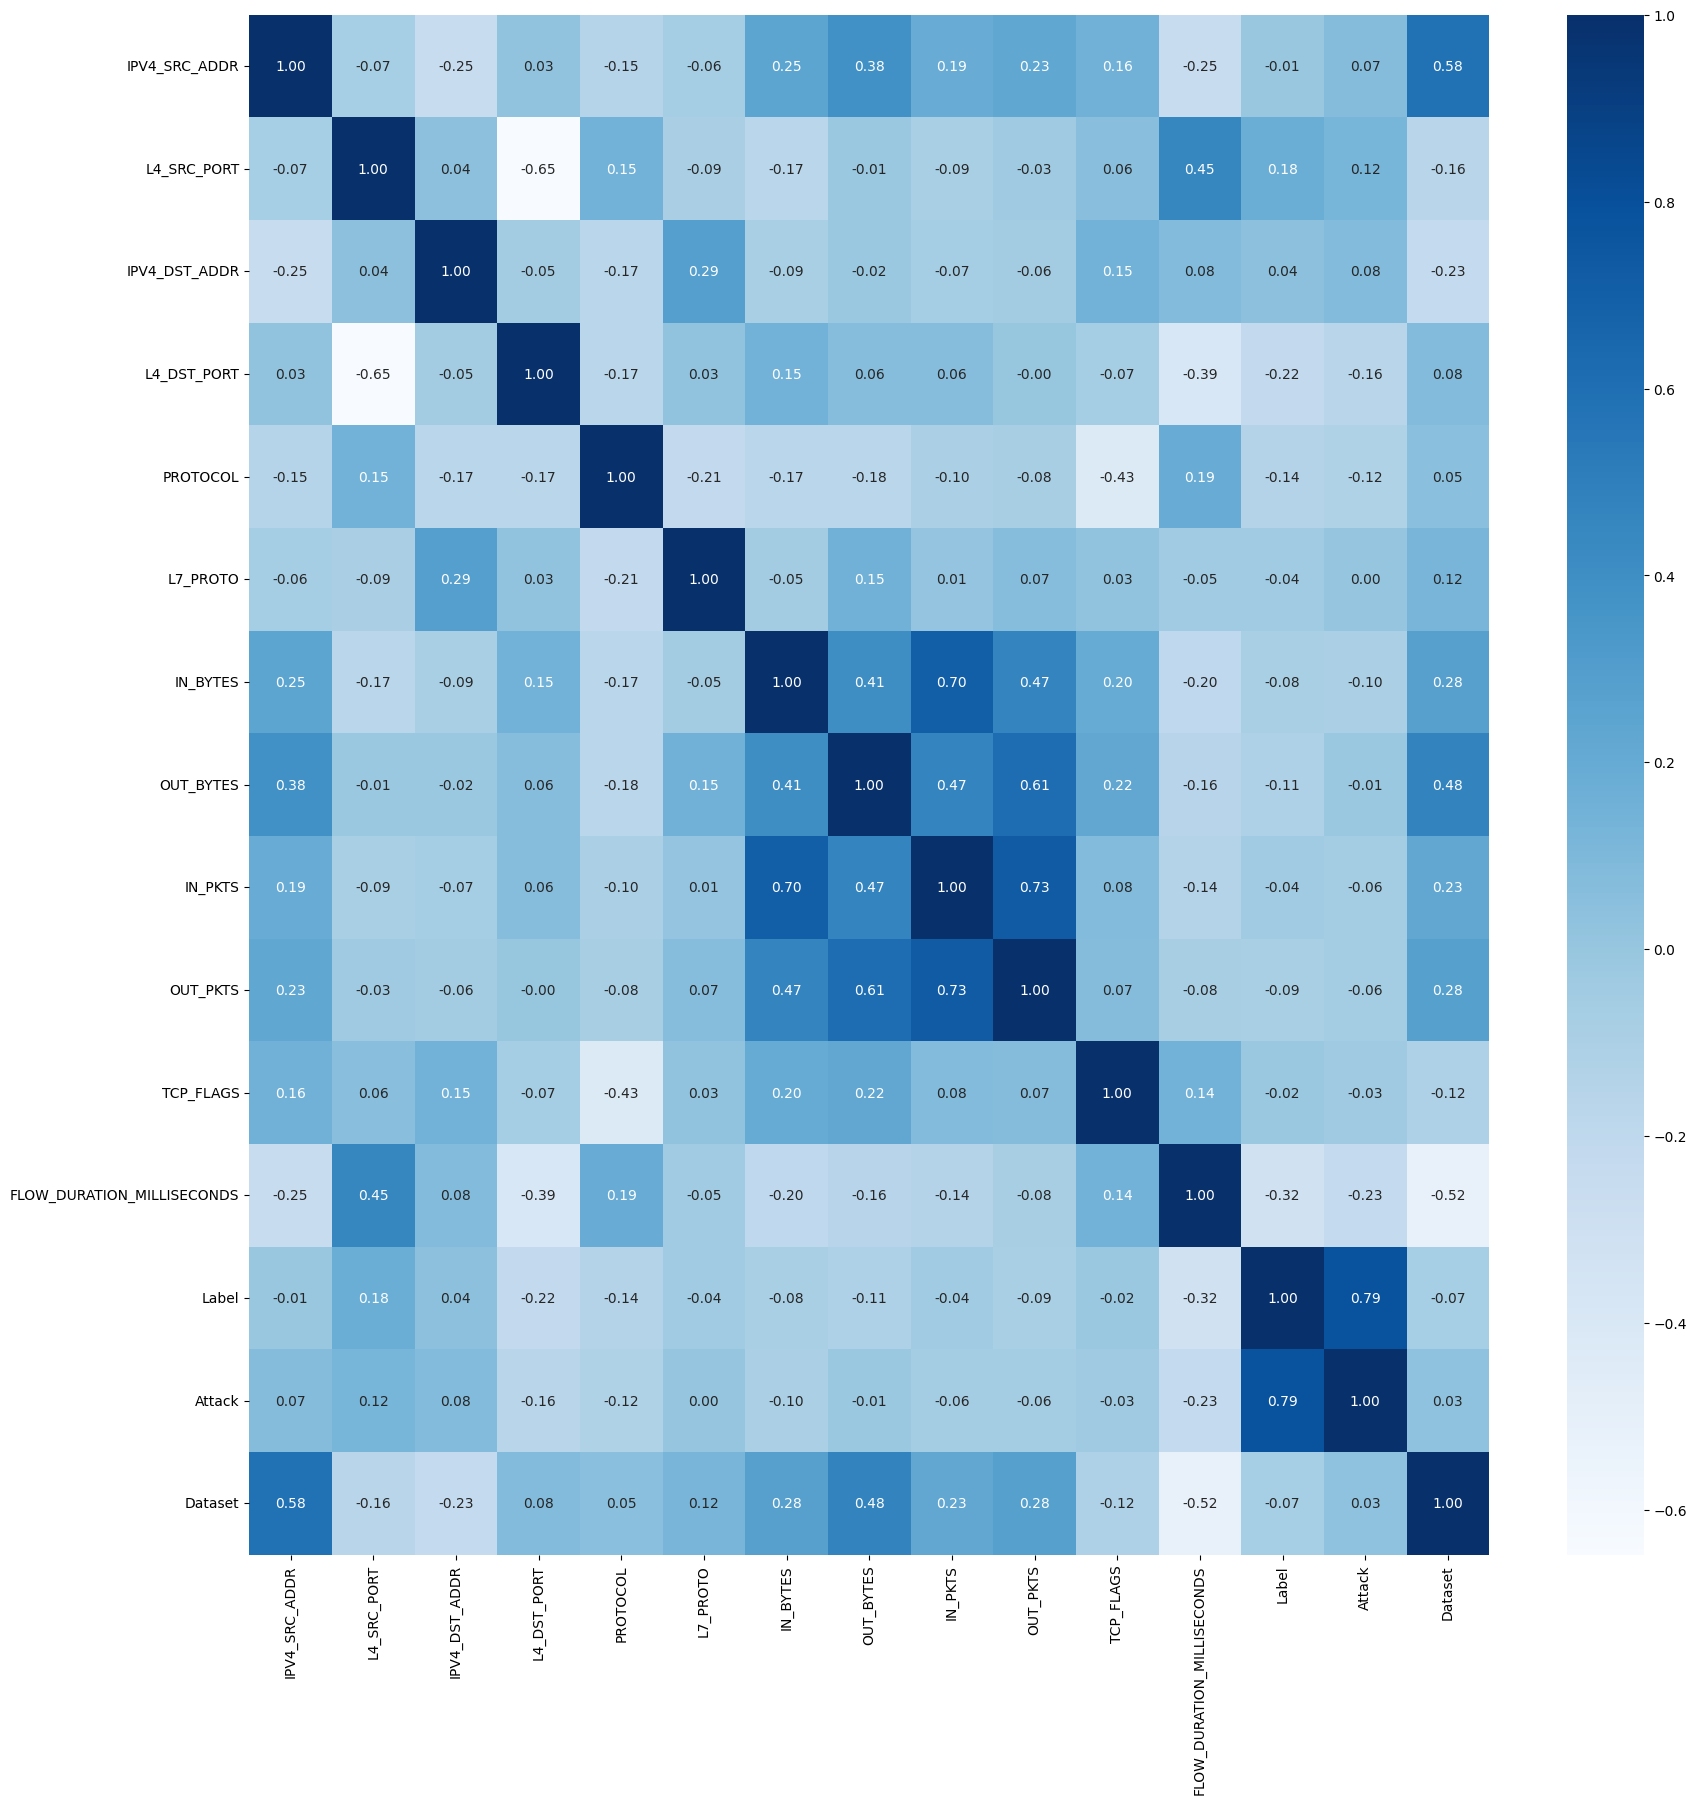

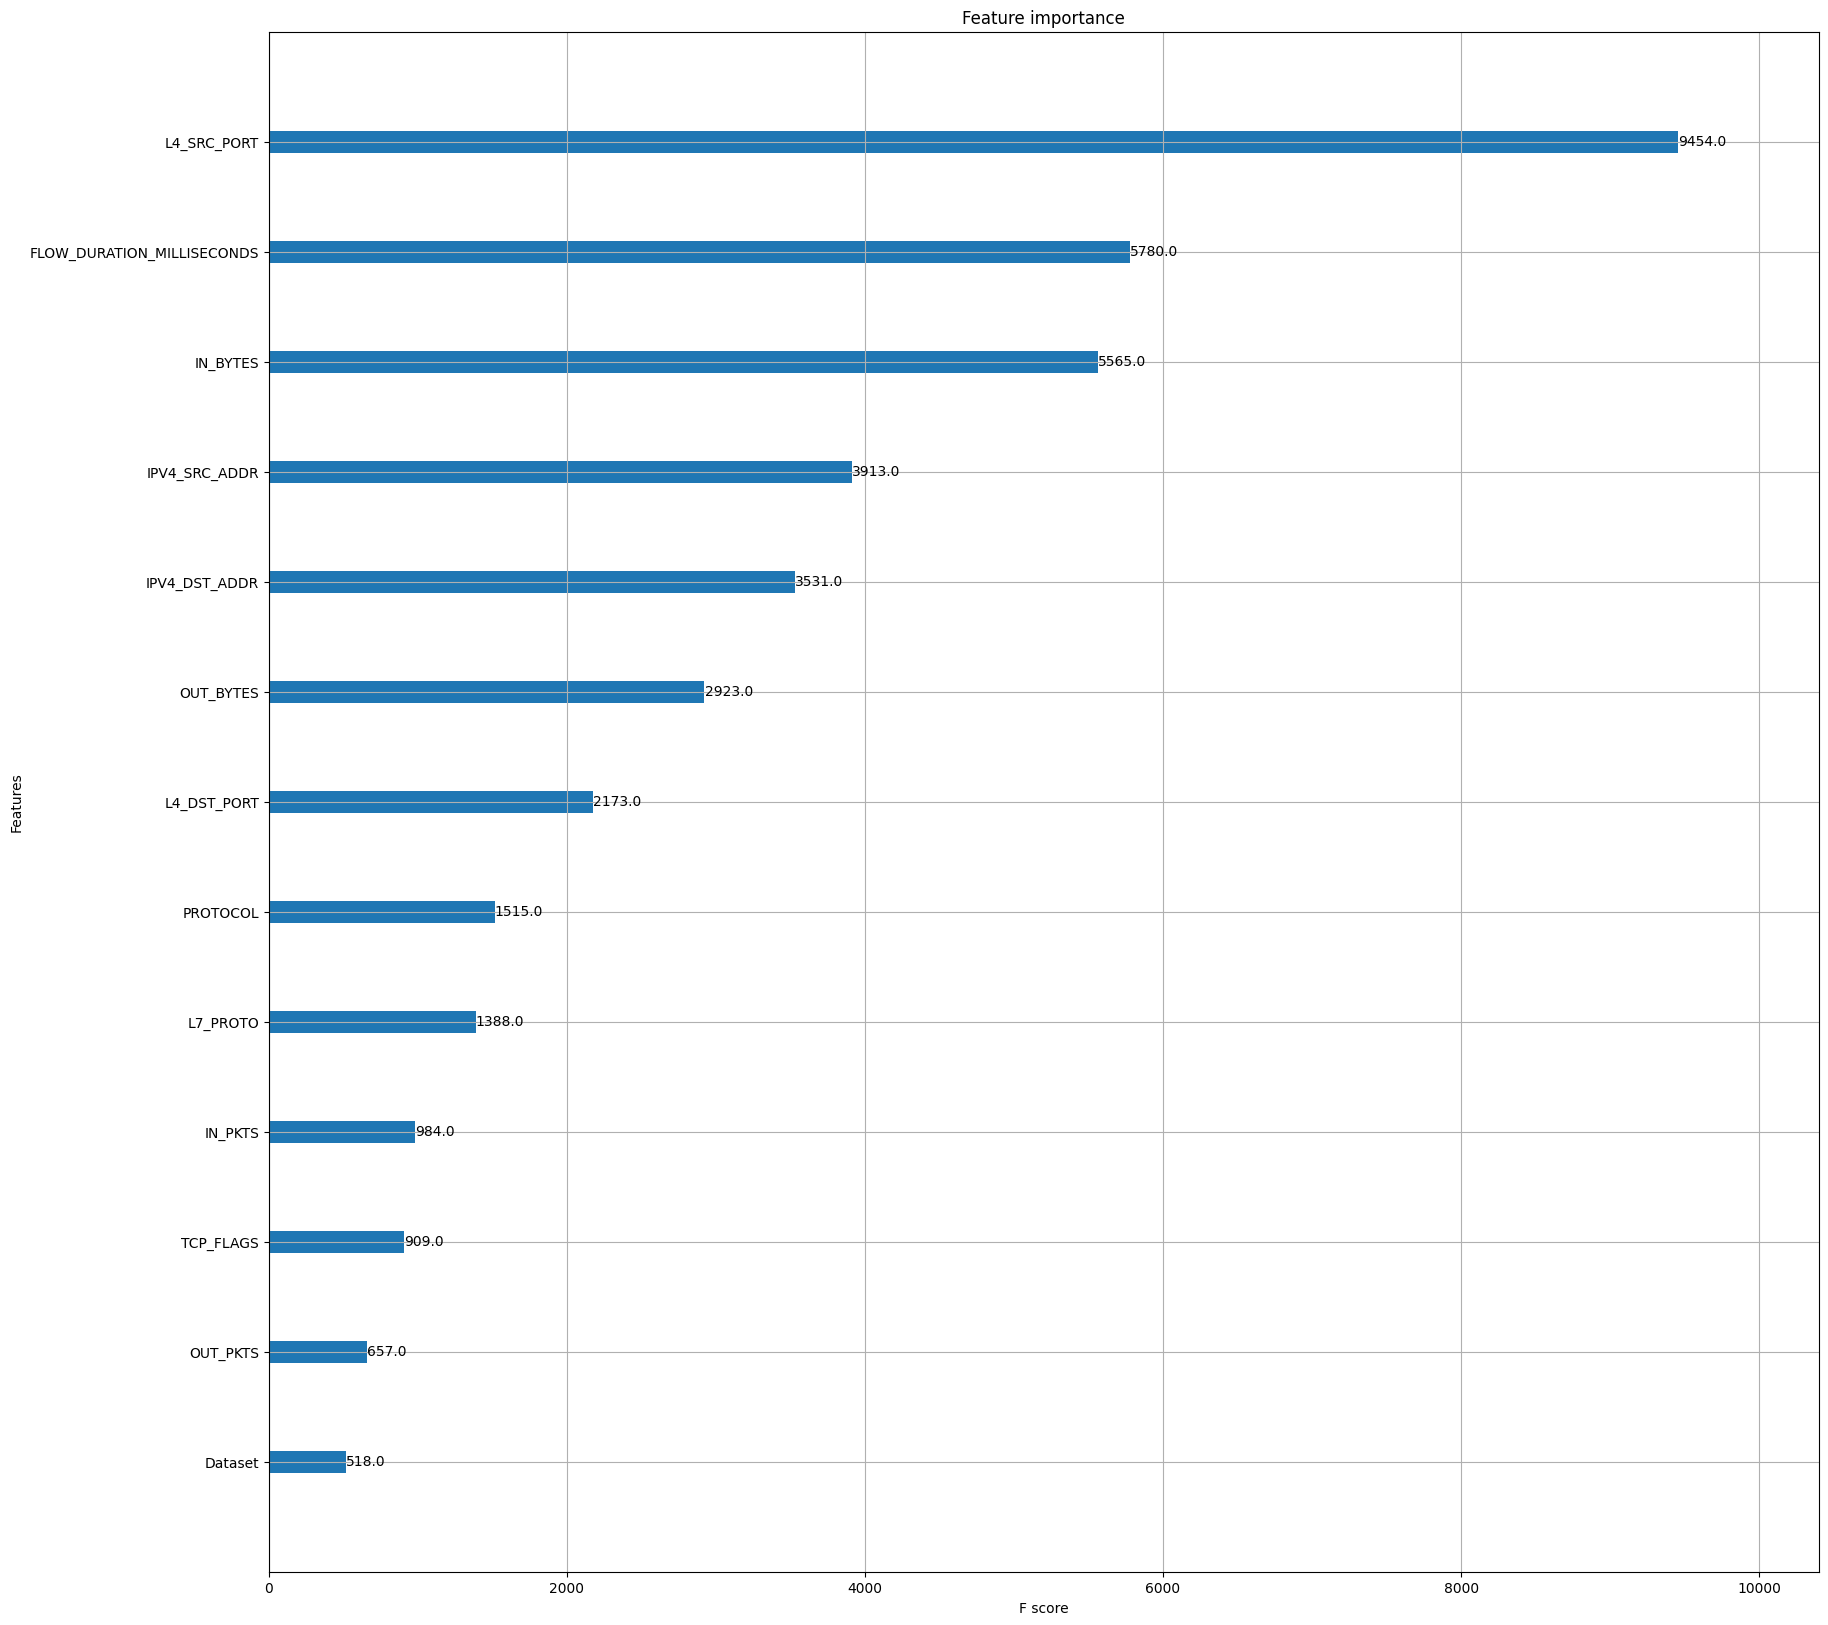

In [62]:
# plot corelation matrix
corr = df_10_enc.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')

# plot feature importance
plt.figure(figsize=(20, 20))
xgb.plot_importance(xgb_clf_10, ax=plt.gca())




In [11]:


# create the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=42,verbosity=1, n_jobs=-1)

# fit the classifier to the training data witj njobs=-1
xgb_clf.fit(train_enc.drop(['Attack', 'Label'], axis=1), train_enc['Attack'], early_stopping_rounds=10,
            eval_metric='aucpr', eval_set=[(test_enc.drop(['Attack', 'Label'], axis=1), test_enc['Attack'])])



c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.60517
[1]	validation_0-aucpr:0.65371
[2]	validation_0-aucpr:0.67948
[3]	validation_0-aucpr:0.68394
[4]	validation_0-aucpr:0.69646
[5]	validation_0-aucpr:0.70392
[6]	validation_0-aucpr:0.70753
[7]	validation_0-aucpr:0.71543
[8]	validation_0-aucpr:0.71930
[9]	validation_0-aucpr:0.72334
[10]	validation_0-aucpr:0.72586
[11]	validation_0-aucpr:0.72713
[12]	validation_0-aucpr:0.72830
[13]	validation_0-aucpr:0.72683
[14]	validation_0-aucpr:0.72874
[15]	validation_0-aucpr:0.73425
[16]	validation_0-aucpr:0.73524
[17]	validation_0-aucpr:0.73791
[18]	validation_0-aucpr:0.73826
[19]	validation_0-aucpr:0.73987
[20]	validation_0-aucpr:0.74121
[21]	validation_0-aucpr:0.74255
[22]	validation_0-aucpr:0.74388
[23]	validation_0-aucpr:0.74405
[24]	validation_0-aucpr:0.74601
[25]	validation_0-aucpr:0.74871
[26]	validation_0-aucpr:0.75230
[27]	validation_0-aucpr:0.75318
[28]	validation_0-aucpr:0.75409
[29]	validation_0-aucpr:0.75292
[30]	validation_0-aucpr:0.75496
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [17]:
xgb_clf.save_model('xgb_model.json')



In [13]:
# evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# predict on the test data
y_pred = xgb_clf.predict(test_enc.drop(['Attack', 'Label'], axis=1))

# calculate the accuracy and print it
accuracy = accuracy_score(test_enc['Attack'], y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))





Accuracy: 95.46%


In [74]:
df_10_enc.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,6890,0,2188,0,70,0,168,0,1,0,0,0,1,0,3
1,6893,0,2190,0,160,0,168,0,1,0,0,0,1,0,3
2,6892,0,2188,0,68,0,168,0,1,0,0,0,1,0,3
3,6890,0,2188,0,62,0,168,0,1,0,0,0,1,0,3
4,6892,63742,2190,41,6,57,764,1266,9,8,16,559,1,0,3


# Deep learning

In [43]:
def plot_model_loss_accuracy(history,model_name,big_loss=False):
  """ Plot the model loss and accuracy for training and validation data

  Args:
      history (keras.callbacks.History): History object returned by model.fit()
      model_name (str): Name of the model
  """
  if big_loss:
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.plot(history.history['accuracy'], label="Training Accuracy", color='blue')
    ax1.plot(history.history['val_accuracy'], label="Validation Accuracy", color='orange')

    ax2 = ax1.twinx()  # create a second y-axis that shares the same x-axis as ax1
    ax2.set_ylabel('Loss')
    ax2.plot(history.history['loss'], label="Training Loss", color='green')
    ax2.plot(history.history['val_loss'], label="Validation Loss", color='red')

    max_val_acc = max(history.history['val_accuracy'])
    max_val_acc_epoch = history.history['val_accuracy'].index(max_val_acc)
    ax1.plot(max_val_acc_epoch, max_val_acc, marker='o', markersize=5, color="red")
    ax1.annotate("Max Validation Accuracy: {:.2f}%".format(max_val_acc*100), (max_val_acc_epoch, max_val_acc), xytext=(max_val_acc_epoch, max_val_acc+0.05), arrowprops=dict(facecolor='black', shrink=0.05))

    ax1.set_title('Training and Validation Accuracy/Loss for ' + model_name)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()
    plt.show()
  else:

    plt.plot(history.history['accuracy'],label="Training Accuracy")
    plt.plot(history.history['val_accuracy'],label="Validation Accuracy")

    plt.plot(history.history['loss'],label="Training Loss")
    plt.plot(history.history['val_loss'],label="Validation Loss")
    # plot the max validation accuracy
    max_val_acc = max(history.history['val_accuracy'])
    max_val_acc_epoch = history.history['val_accuracy'].index(max_val_acc)
    plt.plot(max_val_acc_epoch, max_val_acc, marker='o', markersize=5, color="red")
    plt.annotate("Max Validation Accuracy: {:.2f}%".format(max_val_acc*100), (max_val_acc_epoch, max_val_acc), xytext=(max_val_acc_epoch, max_val_acc+0.05), arrowprops=dict(facecolor='black', shrink=0.05))
    plt.title('Training and Validation Accuracy/Loss for ' + model_name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')

    
    plt.legend()
    plt.show()

In [44]:
def format_data_time_step(data, time_step,type="Attack"):
    """
    Format time-series data into a format suitable for training a recurrent neural network.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing the time-series data. The DataFrame should contain a 'label' column
        and one or more feature columns.

    time_step : int
        The number of time steps (i.e., rows) to include in each sample.

    Returns
    -------
    tuple
        A tuple containing the following six elements in the order given:

        train_data : numpy.ndarray
            An array of shape (n_samples_train, time_step, n_features) containing the training data.

        train_labels : numpy.ndarray
            An array of shape (n_samples_train,) containing the training labels.

        val_data : numpy.ndarray
            An array of shape (n_samples_val, time_step, n_features) containing the validation data.

        val_labels : numpy.ndarray
            An array of shape (n_samples_val,) containing the validation labels.

        test_data : numpy.ndarray
            An array of shape (n_samples_test, time_step, n_features) containing the test data.

        test_labels : numpy.ndarray
            An array of shape (n_samples_test,) containing the test labels.

    Notes
    -----
    This function splits the data into training, validation, and test sets and reshapes the data into
    samples of length `time_step`. The training set includes the first 70% of the data, the validation
    set includes the next 15%, and the test set includes the final 15%. But this is totally arbitrary so dont realy take in account
    """
    unique_labels = data['Attack'].unique() if type == "Attack" else data['Label'].unique()
    # Drop 'Label' or 'Attack' column from data
    data = data.drop(columns=['Label']) if type == "Attack" else data.drop(columns=['Attack'])
    train_df,val_df,test_df = pd.DataFrame(columns=data.columns), pd.DataFrame(columns=data.columns), pd.DataFrame(columns=data.columns)
    for label in unique_labels:
        label_df = data[data['Attack'] == label] if type == "Attack" else data[data['Label'] == label]
        train_samples = label_df.iloc[:int(len(label_df) * 0.70)]
        test_samples = label_df.iloc[int(len(label_df) * 0.70):int(len(label_df) * 0.90)]
        val_samples = label_df.iloc[int(len(label_df) * 0.90):]

        train_df = train_df.append(train_samples)
        val_df = val_df.append(val_samples)
        test_df = test_df.append(test_samples)

    def reshape_data(data):
        data_list = []
        for i in range(len(data) - time_step + 1):
            data_list.append(data[i:i+time_step, :])
        return np.array(data_list)
    
    train_data = reshape_data(train_df.drop(['Attack'], axis=1).to_numpy()) if type == "Attack" else reshape_data(train_df.drop(['Label'], axis=1).to_numpy())
    train_labels = train_df['Attack'].iloc[time_step-1:].to_numpy() if type == "Attack" else train_df['Label'].iloc[time_step-1:].to_numpy()

    val_data = reshape_data(val_df.drop(['Attack'], axis=1).to_numpy()) if type == "Attack" else reshape_data(val_df.drop(['Label'], axis=1).to_numpy())
    val_labels = val_df['Attack'].iloc[time_step-1:].to_numpy() if type == "Attack" else val_df['Label'].iloc[time_step-1:].to_numpy()

    test_data = reshape_data(test_df.drop(['Attack'], axis=1).to_numpy()) if type == "Attack" else reshape_data(test_df.drop(['Label'], axis=1).to_numpy())
    test_labels = test_df['Attack'].iloc[time_step-1:].to_numpy() if type == "Attack" else test_df['Label'].iloc[time_step-1:].to_numpy()

    # convert to float32
    train_data = train_data.astype(np.float32)
    val_data = val_data.astype(np.float32)
    test_data = test_data.astype(np.float32)

    train_labels = train_labels.astype(np.float32)
    val_labels = val_labels.astype(np.float32)
    test_labels = test_labels.astype(np.float32)
    
        

    return train_data, train_labels, val_data, val_labels, test_data, test_labels
    




        




In [45]:
train_deep_data, train_deep_labels, val_deep_data, val_deep_labels, test_deep_data, test_deep_labels = format_data_time_step(df_10_enc, 50)
train_deep_data_lab, train_deep_labels_lab, val_deep_data_lab, val_deep_labels_lab, test_deep_data_lab, test_deep_labels_lab = format_data_time_step(df_10_enc, 50,type="Label")

C:\Users\enzoh\AppData\Local\Temp\ipykernel_1572\2184589771.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(train_samples)
C:\Users\enzoh\AppData\Local\Temp\ipykernel_1572\2184589771.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val_df = val_df.append(val_samples)
C:\Users\enzoh\AppData\Local\Temp\ipykernel_1572\2184589771.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(test_samples)
C:\Users\enzoh\AppData\Local\Temp\ipykernel_1572\2184589771.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(train_samples)
C:\Users\enzoh\AppData\Local\Temp

In [46]:
input_shape = (train_deep_data.shape[1],train_deep_data.shape[2])
num_labels = len(np.unique(train_deep_labels))

input_shape_lab = (train_deep_data_lab.shape[1],train_deep_data_lab.shape[2])
num_labels_lab = len(np.unique(train_deep_labels_lab))

In [47]:
print("input_shape: ", input_shape)
print("num_labels: ", num_labels)
print("input_shape_lab: ", input_shape_lab)
print("num_labels_lab: ", num_labels_lab)

input_shape:  (50, 12)
num_labels:  21
input_shape_lab:  (50, 12)
num_labels_lab:  2


## Simple Lstm

### model

In [48]:
# create the model
simple_lstm_model = keras.Sequential([
    keras.layers.LSTM(128, input_shape=input_shape),
    keras.layers.Dense(num_labels, activation='softmax')
])

simple_lstm_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

simple_lstm_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               72192     
                                                                 
 dense (Dense)               (None, 21)                2709      
                                                                 
Total params: 74,901
Trainable params: 74,901
Non-trainable params: 0
_________________________________________________________________


### Fit and test

In [49]:
history_simple_lstm = simple_lstm_model.fit(train_deep_data, train_deep_labels, epochs=10, batch_size=512,validation_data=(val_deep_data, val_deep_labels))

Epoch 1/10
1640/1640 [==============================] - 22s 8ms/step - loss: 0.1479 - accuracy: 0.9637 - val_loss: 0.0557 - val_accuracy: 0.9839
Epoch 2/10
1640/1640 [==============================] - 13s 8ms/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 0.0502 - val_accuracy: 0.9816
Epoch 3/10
1640/1640 [==============================] - 13s 8ms/step - loss: 0.0419 - accuracy: 0.9854 - val_loss: 0.0723 - val_accuracy: 0.9776
Epoch 4/10
1640/1640 [==============================] - 13s 8ms/step - loss: 0.0450 - accuracy: 0.9835 - val_loss: 0.0635 - val_accuracy: 0.9805
Epoch 5/10
1640/1640 [==============================] - 13s 8ms/step - loss: 0.0481 - accuracy: 0.9827 - val_loss: 0.0659 - val_accuracy: 0.9791
Epoch 6/10
1640/1640 [==============================] - 13s 8ms/step - loss: 0.0562 - accuracy: 0.9793 - val_loss: 0.0738 - val_accuracy: 0.9791
Epoch 7/10
1640/1640 [==============================] - 13s 8ms/step - loss: 0.0560 - accuracy: 0.9793 - val_loss: 0.0764 - val_ac

In [50]:
from keras import backend as K
K.clear_session()

simple_lstm_model_lab = keras.Sequential([
    keras.layers.LSTM(128, input_shape=input_shape_lab),
    keras.layers.Dense(num_labels_lab, activation='softmax')
])

simple_lstm_model_lab.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

simple_lstm_model_lab.summary()

history_simple_lstm_lab = simple_lstm_model_lab.fit(train_deep_data_lab, train_deep_labels_lab, epochs=10, batch_size=512,validation_data=(val_deep_data_lab, val_deep_labels_lab))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               72192     
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 72,450
Trainable params: 72,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6560/6560 [==============================] - 51s 8ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 2/10
6560/6560 [==============================] - 50s 8ms/step - loss: 8.1378e-04 - accuracy: 0.9998 - val_loss: 2.1630e-04 - val_accuracy: 1.0000
Epoch 3/10
6560/6560 [==============================] - 50s 8ms/step - loss: 4.5074e-04 - accuracy: 0.9999 - val_loss: 0.0012 - val_accuracy: 0.9997
E

In [51]:
simple_lstm_model.evaluate(test_deep_data, test_deep_labels, verbose=2)

7496/7496 - 22s - loss: 0.0479 - accuracy: 0.9856 - 22s/epoch - 3ms/step


[0.047895658761262894, 0.9855952262878418]

In [53]:
simple_lstm_model_lab.evaluate(test_deep_data_lab, test_deep_labels_lab, verbose=2)

7496/7496 - 21s - loss: 0.0047 - accuracy: 0.9991 - 21s/epoch - 3ms/step


[0.00473267724737525, 0.9991244673728943]

In [60]:
#check how many false negative we have for the Benign class and False positive for Benign class for simple_lstm_model
y_pred = simple_lstm_model.predict(test_deep_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_deep_labels
print("False Negative for Benign class: ", np.sum((y_true == 0) & (y_pred == 1)))
print("False Positive for Benign class: ", np.sum((y_true == 1) & (y_pred == 0)))





InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

7496/7496 [==============================] - 27s 4ms/step


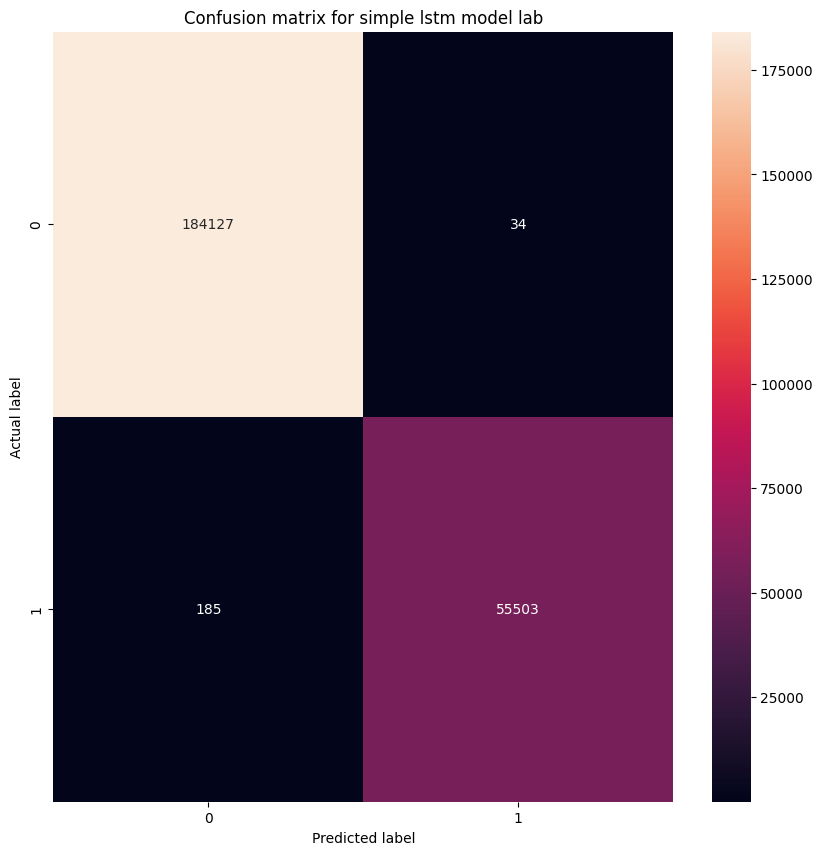

In [101]:
# plot confusion matrix for simple lstm model lab
y_pred = simple_lstm_model_lab.predict(test_deep_data_lab)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_deep_labels_lab
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix for simple lstm model lab')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



7496/7496 [==============================] - 21s 3ms/step


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

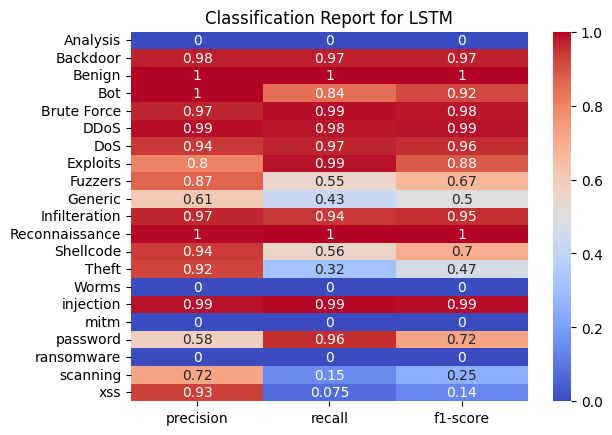

In [57]:
plot_classification_report(simple_lstm_model,test_deep_data,test_deep_labels,list_of_le_10['Attack'].classes_,"LSTM",deep_learning=True)

## CNN

### Modèle 

In [22]:
model_cnn = keras.Sequential([
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape_lab),
    keras.layers.MaxPooling1D(pool_size=2),
    # dropout layer
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    # dropout layer
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu',padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    # dropout layer
    keras.layers.Dense(num_labels_lab, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [24]:
history_cnn = model_cnn.fit(train_deep_data_lab, train_deep_labels_lab, epochs=10, batch_size=512,validation_data=(val_deep_data_lab, val_deep_labels_lab))

Epoch 1/10
1640/1640 [==============================] - 10s 6ms/step - loss: 0.2146 - accuracy: 0.9380 - val_loss: 0.1489 - val_accuracy: 0.9999
Epoch 2/10
1640/1640 [==============================] - 9s 5ms/step - loss: 0.0968 - accuracy: 0.9465 - val_loss: 0.1707 - val_accuracy: 0.9983
Epoch 3/10
1640/1640 [==============================] - 9s 5ms/step - loss: 0.0352 - accuracy: 0.9939 - val_loss: 0.1376 - val_accuracy: 0.9991
Epoch 4/10
1640/1640 [==============================] - 8s 5ms/step - loss: 0.0396 - accuracy: 0.9892 - val_loss: 0.4882 - val_accuracy: 0.9995
Epoch 5/10
1640/1640 [==============================] - 9s 5ms/step - loss: 0.0248 - accuracy: 0.9953 - val_loss: 0.3046 - val_accuracy: 0.9997
Epoch 6/10
1640/1640 [==============================] - 9s 5ms/step - loss: 0.0124 - accuracy: 0.9983 - val_loss: 0.7930 - val_accuracy: 0.9998
Epoch 7/10
1640/1640 [==============================] - 9s 5ms/step - loss: 0.0712 - accuracy: 0.9936 - val_loss: 0.0114 - val_accuracy

In [25]:
model_cnn.evaluate(test_deep_data_lab, test_deep_labels_lab, verbose=2)

7496/7496 - 15s - loss: 19.4215 - accuracy: 0.9993 - 15s/epoch - 2ms/step


[19.421480178833008, 0.9992954134941101]

7496/7496 [==============================] - 14s 2ms/step


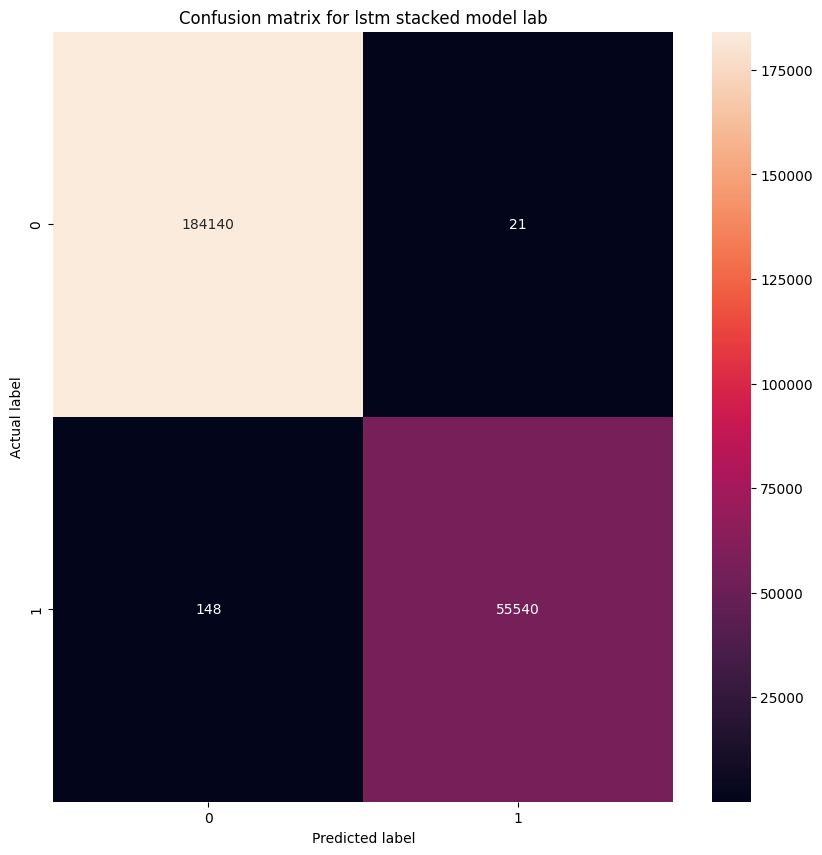

In [27]:
# plot confusion matrix for simple lstm model lab
from sklearn.metrics import confusion_matrix
y_pred = model_cnn.predict(test_deep_data_lab)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_deep_labels_lab
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix for lstm stacked model lab')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


5623/5623 [==============================] - 9s 2ms/step


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

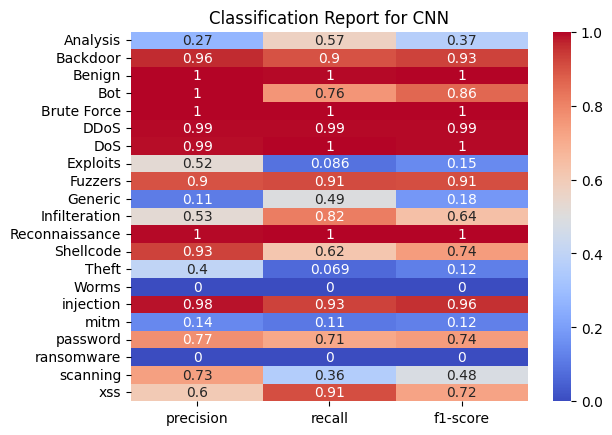

In [31]:
plot_classification_report(model_cnn,test_deep_data,test_deep_labels,list_of_le_10['Attack'].classes_,"CNN",deep_learning=True)

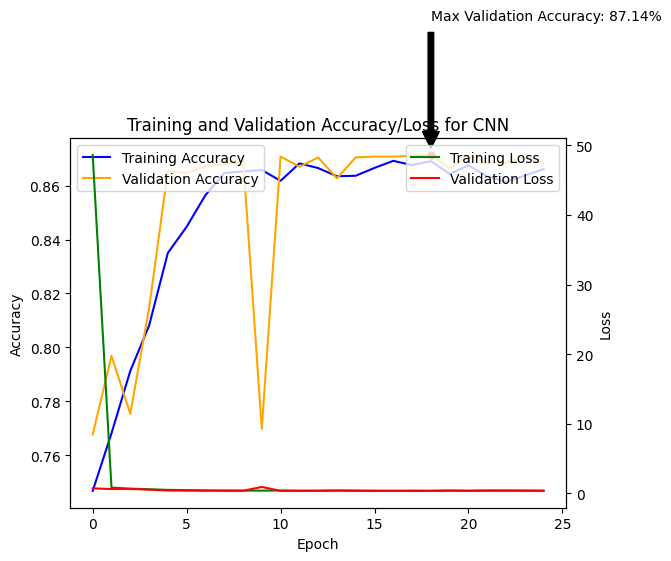

In [27]:
plot_model_loss_accuracy(history_cnn,"CNN",big_loss=True)


## Stacked LSTM

### Model

In [39]:
model_stacked_lstm = keras.Sequential([
    keras.layers.LSTM(128, input_shape=input_shape_lab, return_sequences=True),
    keras.layers.Dropout(0.5),
    keras.layers.LSTM(128,return_sequences=True),
    keras.layers.Dropout(0.5),
    keras.layers.LSTM(128),
    keras.layers.Dense(num_labels_lab, activation='softmax')
])

model_stacked_lstm.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])






In [32]:
history_stacked_lstm = model_stacked_lstm.fit(train_deep_data_lab, train_deep_labels_lab, epochs=5, batch_size=1024,validation_data=(val_deep_data_lab, val_deep_labels_lab))

Epoch 1/5
820/820 [==============================] - 36s 30ms/step - loss: 0.0165 - accuracy: 0.9961 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 2/5
820/820 [==============================] - 23s 29ms/step - loss: 1.3961e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9999
Epoch 3/5
820/820 [==============================] - 23s 28ms/step - loss: 1.7779e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 0.9999
Epoch 4/5
820/820 [==============================] - 24s 29ms/step - loss: 2.2893e-04 - accuracy: 0.9999 - val_loss: 0.0011 - val_accuracy: 0.9999
Epoch 5/5
820/820 [==============================] - 24s 29ms/step - loss: 1.0199e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9998


In [33]:
model_stacked_lstm.evaluate(test_deep_data_lab, test_deep_labels_lab, verbose=2)

7496/7496 - 61s - loss: 0.0093 - accuracy: 0.9992 - 61s/epoch - 8ms/step


[0.009260191582143307, 0.9991536140441895]

7496/7496 [==============================] - 114s 15ms/step


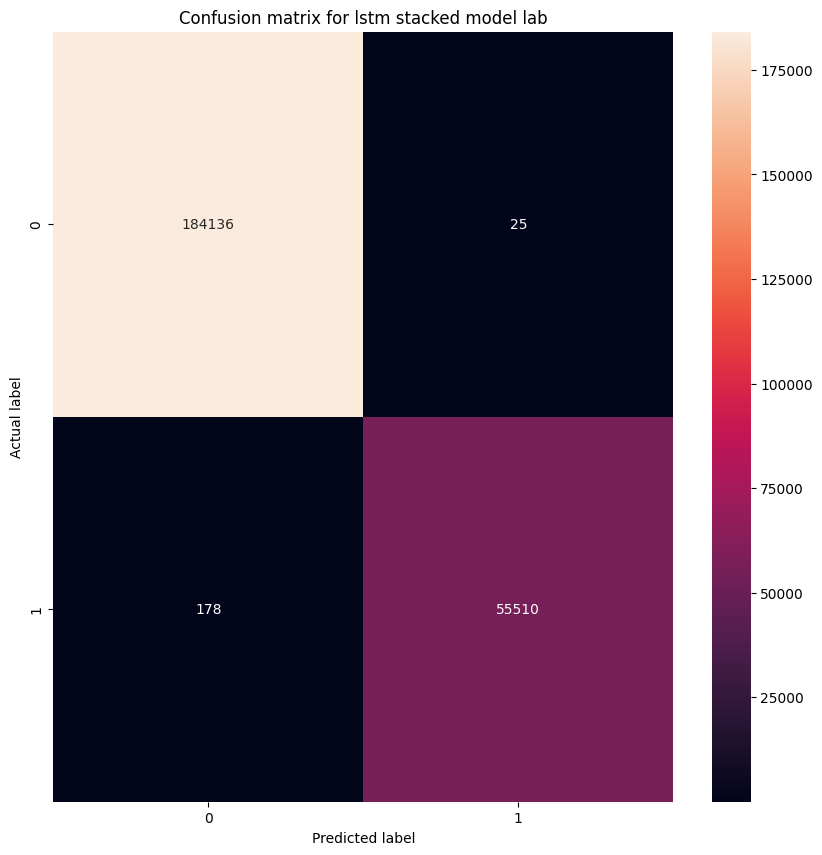

In [34]:
# plot confusion matrix for simple lstm model lab
y_pred = model_stacked_lstm.predict(test_deep_data_lab)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_deep_labels_lab
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix for lstm stacked model lab')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

